In [69]:
%load_ext autoreload
%autoreload 2
    
import os
import numpy as np
import matplotlib.pyplot as plt
from nwb_pipeline.csc_reader import load_mat_file
from ripple_detection.slow_wave_ripple import get_start_end_arrays
from sleep_score.analysis import (
    downsample_sleep_score, plot_sleep_stages, plot_two_sleep_stages, plot_contingency_matrix, load_sleep_score,
    plot_ripple_rate_by_sleep_state, plot_activation_by_ripple
)

# ripple_file = os.path.join('/Users/XinNiuAdmin/HoffmanMount/data/PIPELINE_vc/ANALYSIS/MovieParadigm/566_MovieParadigm/Experiment-8/'
#                'ripple_detection', 'RMH2.npz')
# sleep_score_rockelle = ('/Users/XinNiuAdmin/Library/CloudStorage/Box-Box/Vwani_Movie/sleep scoring/'
#                         'EXP8_Movie24&566_firstpass.csv')
# sleep_score_file = ('/Users/XinNiuAdmin/HoffmanMount/data/PIPELINE_vc/ANALYSIS/MovieParadigm/'
#                     '566_MovieParadigm/Experiment-8/sleep_score/sleepScore_ROF2_001.mat')
# activation_file = ('/Users/XinNiuAdmin/Documents/brain_decoding/results/movie_24_merged/'
#                    '566_None_multi-vit_test_optimalX_CARX_2024-11-13_16-02-47/memory/prediction/epoch40_test_sleep_1_results.npy')

# ripple_file = os.path.join('/Users/XinNiuAdmin/HoffmanMount/data/PIPELINE_vc/ANALYSIS/MovieParadigm/562_MovieParadigm/Experiment-6/'
#                'ripple_detection', 'LAH5.npz')
# sleep_score_rockelle = ('/Users/XinNiuAdmin/Library/CloudStorage/Box-Box/Vwani_Movie/sleep scoring/'
#                         'EXP6_Movie24&562_firstpass.csv')
# sleep_score_file = ('/Users/XinNiuAdmin/HoffmanMount/data/PIPELINE_vc/ANALYSIS/MovieParadigm/'
#                     '562_MovieParadigm/Experiment-6/sleep_score/sleepScore_LOFAC5_001.mat')

ripple_file = os.path.join('/Users/XinNiuAdmin/HoffmanMount/data/PIPELINE_vc/ANALYSIS/MovieParadigm/561_MovieParadigm/Experiment-4/'
               'ripple_detection', 'LMH.npz')
sleep_score_rockelle = ('/Users/XinNiuAdmin/Library/CloudStorage/Box-Box/Vwani_Movie/sleep scoring/'
                        'EXP4_Movie24&561_firstpass.csv')
sleep_score_file = ('/Users/XinNiuAdmin/HoffmanMount/data/PIPELINE_vc/ANALYSIS/MovieParadigm/'
                    '561_MovieParadigm/Experiment-4/sleep_score/sleepScore_LAC4_001.mat')

activation_fs = 4
ripple_fs = 500  # Hz
ripple_data = np.load(ripple_file)
ripple_array = ripple_data["array"]
print(ripple_array.shape)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(1, 17204895)


(7302,)

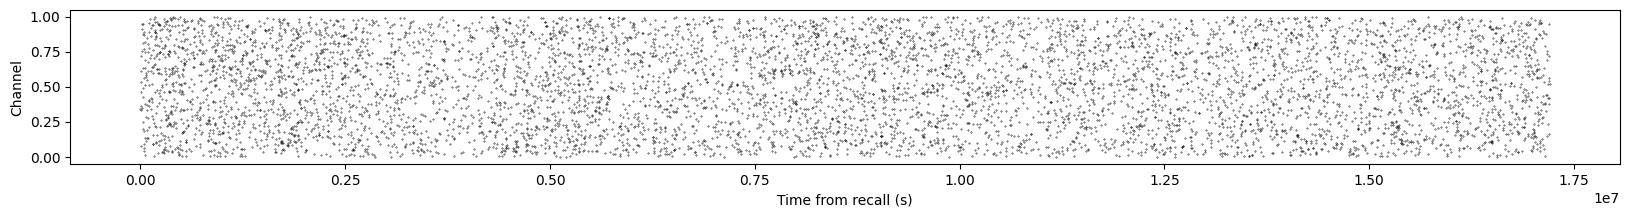

In [70]:


start_array, end_array = get_start_end_arrays(ripple_array) 
start_time = np.where(start_array[0,:])[0]
end_time = np.where(end_array[0,:])[0]

# plot raster
plt.subplots(1,1,figsize=(20,2))   
plt.scatter(start_time, np.random.rand(len(start_time)), s=.1, color='k') # SWR time v. trial
plt.xlabel('Time from recall (s)')
plt.ylabel('Channel')

start_time.shape

In [71]:
np.sum(start_array,1)[0]/(np.shape(start_array)[1]/ripple_fs)

np.float64(0.21220704921477287)

In [72]:

sleep_score_rockelle = load_sleep_score(sleep_score_rockelle)

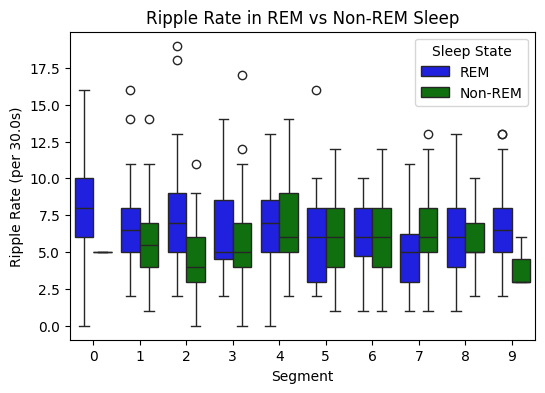

In [73]:
plot_ripple_rate_by_sleep_state(start_time, sleep_score_rockelle)

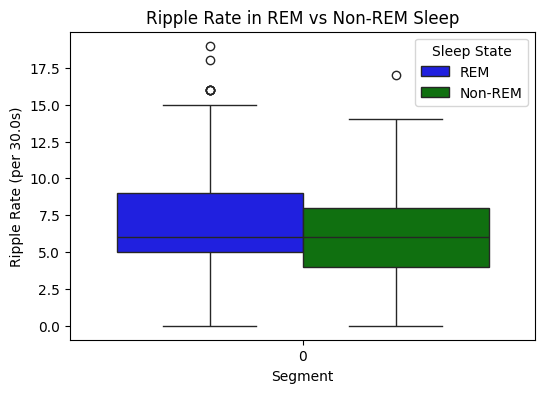

In [74]:
plot_ripple_rate_by_sleep_state(start_time, sleep_score_rockelle, segment_duration=10)

/opt/miniconda3/envs/ripple-detection/lib/python3.10/site-packages/nwb_pipeline/csc_reader.py:303: UserWarning: /Users/XinNiuAdmin/HoffmanMount/data/PIPELINE_vc/ANALYSIS/MovieParadigm/561_MovieParadigm/Experiment-4/sleep_score/sleepScore_LAC4_001.mat is not in MATLAB 7.3 format, loading with scipy.io.loadmat
  warnings.warn(f"{filename} is not in MATLAB 7.3 format, loading with scipy.io.loadmat")


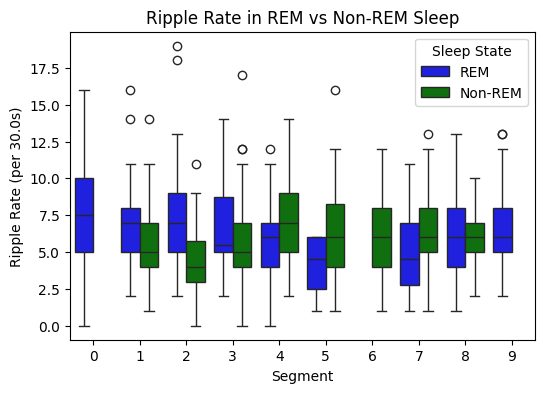

In [75]:

data = load_mat_file(sleep_score_file)
sleep_score_maya = downsample_sleep_score(data['sleep_score_vec'])
plot_ripple_rate_by_sleep_state(start_time, sleep_score_maya)

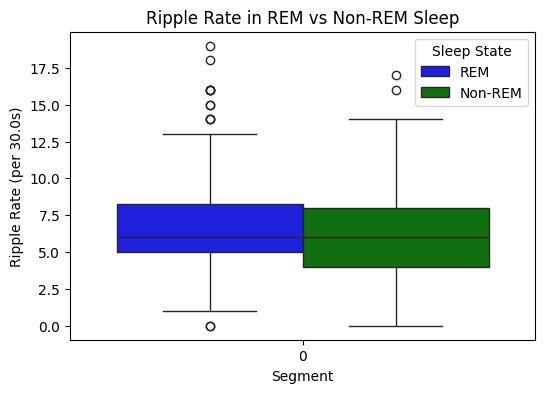

In [76]:
plot_ripple_rate_by_sleep_state(start_time, sleep_score_maya, segment_duration=10)

In [77]:

activation_data = np.load(activation_file)
activation_jack=activation_data[:, 4]
activation_jack


array([0.05080072, 0.00444514, 0.00187394, ..., 0.00022834, 0.00042289,
       0.21594137])

In [ ]:

plot_activation_by_ripple(
    activation_jack, start_time, end_time,
    activation_fs=4, ripple_fs=ripple_fs, 
    activation_label="Activation Jack",
    event_label="Ripple",
)